In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
	sys.path.append(project_root)
from src.validate_focus_format import validate_focus_format

In [21]:
# Importe as bibliotecas de sistema para ajustar o caminho
import sys
import os

# Adicione o diretório raiz do projeto ao caminho do Python
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Carregue o dataset
df = pd.read_csv("../data/raw/focus_simulated_dataset_focus_1.2.csv")

# Valide o formato FOCUS
try:
    from src.validate_focus_format import validate_focus_format
    validate_focus_format(df)
    print("✅ Dataset validado com sucesso para o padrão FOCUS v1.2")
except Exception as e:
    print(f"❌ Erro na validação: {e}")

# Converter datas e renomear colunas para consistência
df.rename(columns={
    'ChargePeriodStart': 'ds',
    'ProviderName': 'Provider',
    'EffectiveCost': 'y',
    'ServiceName': 'Service Category'
}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])


✅ Dataset validado com sucesso para o padrão FOCUS v1.2


--- Valores Ausentes por Coluna ---
InvoiceId                             0
ds                                    0
ChargePeriodEnd                       0
Provider                              0
Service Category                      0
ConsumedQuantity                      0
ConsumedUnit                          0
PricingCurrency                       0
PricingCurrencyListUnitPrice          0
PricingCurrencyContractedUnitPrice    0
PricingCurrencyEffectiveCost          0
BillingCurrency                       0
ListCost                              0
y                                     0
BillingAccountId                      0
BillingAccountType                    0
SubAccountType                        0
RegionId                              0
dtype: int64

--- Custo Total por Provedor ---
Provider
Azure         155532.66
GCP           152530.03
AWS           151142.57
OpenAI        100814.31
Snowflake     100645.03
Databricks     99960.79
Name: y, dtype: float64


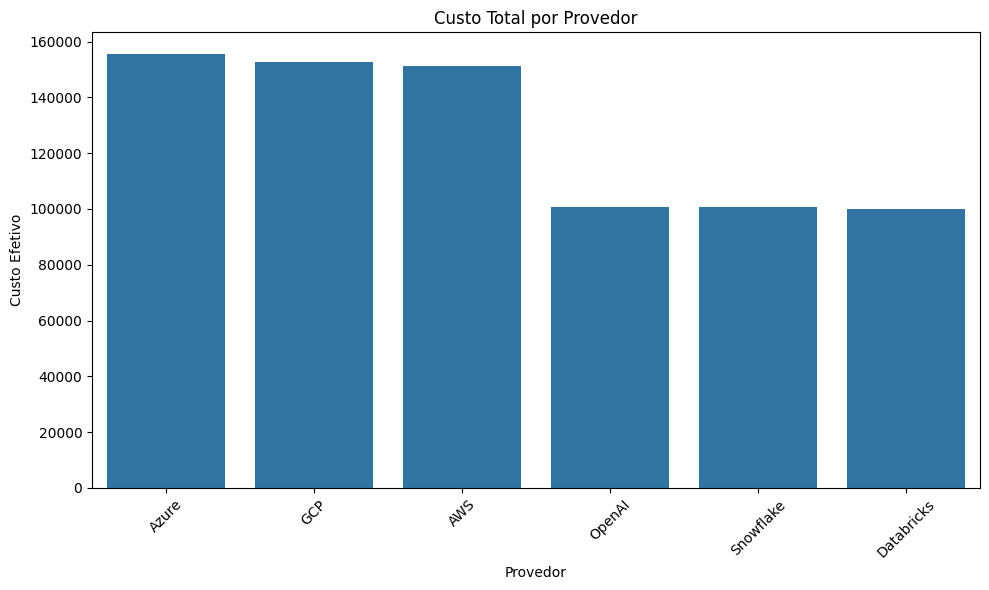

In [22]:
# Análise de valores ausentes e distribuição
print("--- Valores Ausentes por Coluna ---")
print(df.isnull().sum())

# Análise da Distribuição de Custos por Provedor
print("\n--- Custo Total por Provedor ---")
provider_costs = df.groupby('Provider')['y'].sum().sort_values(ascending=False)
print(provider_costs)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=provider_costs.index, y=provider_costs.values)
plt.title('Custo Total por Provedor')
plt.ylabel('Custo Efetivo')
plt.xlabel('Provedor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Agregação para a Previsão (mensal) por Provedor
df_monthly_provider = df.groupby(['Provider', pd.Grouper(key='ds', freq='M')])['y'].sum().reset_index()
df_monthly_provider.rename(columns={'ds': 'ds', 'y': 'y'}, inplace=True)

print("\n--- Dados Agregados Mensalmente por Provedor ---")
print(df_monthly_provider.head())

# Salvar os dados processados por provedor
df_monthly_provider.to_csv("../data/processed/monthly_costs_by_provider.csv", index=False)
print("\nDados agregados por provedor salvos em 'data/processed/monthly_costs_by_provider.csv'.")


--- Dados Agregados Mensalmente por Provedor ---
  Provider         ds         y
0      AWS 2024-06-30   6758.77
1      AWS 2024-07-31  11667.81
2      AWS 2024-08-31  12558.92
3      AWS 2024-09-30  12076.95
4      AWS 2024-10-31  12862.35

Dados agregados por provedor salvos em 'data/processed/monthly_costs_by_provider.csv'.


C:\Users\izado\AppData\Local\Temp\ipykernel_13564\1985291866.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_provider = df.groupby(['Provider', pd.Grouper(key='ds', freq='M')])['y'].sum().reset_index()



--- Custo Total por Categoria de Serviço ---
Service Category
VM                 53640.43
Blob Storage       52163.77
Cloud Storage      51907.06
Lambda             51838.90
Storage            51443.81
Clusters           51372.75
GPT-4 API          50450.62
Cloud Functions    50366.72
Embedding API      50363.69
EC2                50302.30
Compute Engine     50256.25
Functions          49728.46
Warehouse          49201.22
S3                 49001.37
Jobs               48588.04
Name: y, dtype: float64


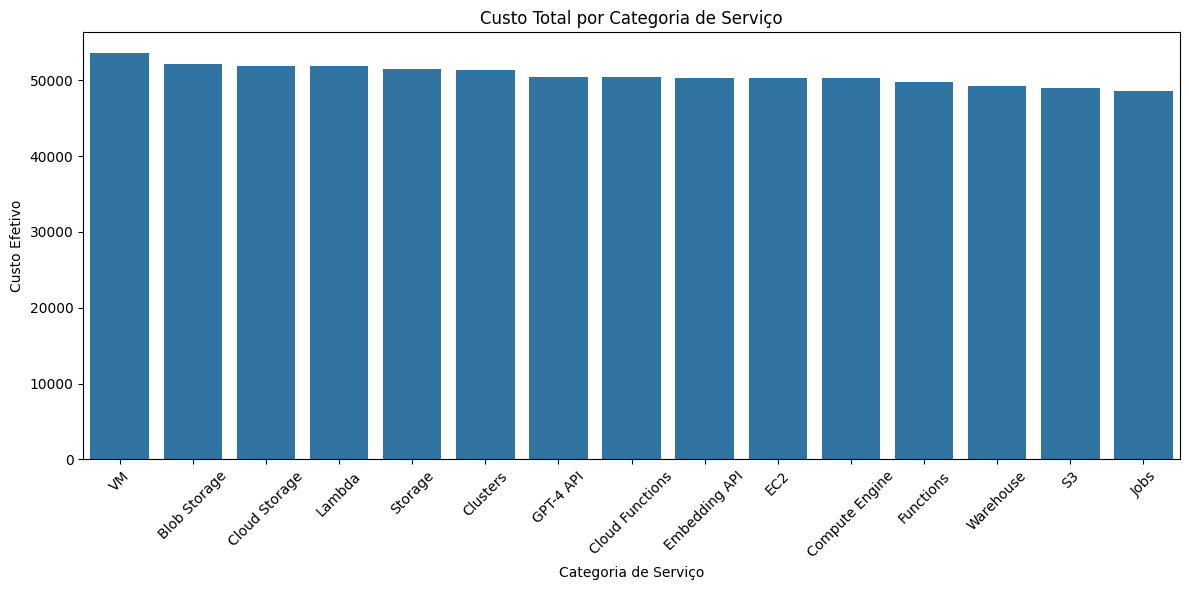

In [24]:
# Análise por Categoria de Serviço
print("\n--- Custo Total por Categoria de Serviço ---")
service_costs = df.groupby('Service Category')['y'].sum().sort_values(ascending=False)
print(service_costs)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=service_costs.index, y=service_costs.values)
plt.title('Custo Total por Categoria de Serviço')
plt.ylabel('Custo Efetivo')
plt.xlabel('Categoria de Serviço')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Célula 1: Carrega os dados e verifica os nomes das colunas.

import pandas as pd
import os

# Ajusta o caminho para carregar o arquivo, navegando para a pasta raiz
file_path = os.path.join(os.getcwd(), '..', 'data', 'raw', 'focus_simulated_dataset_focus_1.2.csv')

# Carrega o CSV para um DataFrame
df = pd.read_csv(file_path)

# Imprime os nomes de todas as colunas.
# Isso vai ajudar a encontrar o nome exato da coluna 'Charge Period Start'
print("Colunas do DataFrame:")
print(df.columns)


Colunas do DataFrame:
Index(['InvoiceId', 'ChargePeriodStart', 'ChargePeriodEnd', 'ProviderName',
       'ServiceName', 'ConsumedQuantity', 'ConsumedUnit', 'PricingCurrency',
       'PricingCurrencyListUnitPrice', 'PricingCurrencyContractedUnitPrice',
       'PricingCurrencyEffectiveCost', 'BillingCurrency', 'ListCost',
       'EffectiveCost', 'BillingAccountId', 'BillingAccountType',
       'SubAccountType', 'RegionId'],
      dtype='object')


In [26]:
# Prepara os dados e treina o modelo de Regressão Linear

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Usa o nome correto da coluna: 'ChargePeriodStart'
df['ChargePeriodStart'] = pd.to_datetime(df['ChargePeriodStart'])

df['ds'] = df['ChargePeriodStart'].dt.to_period('M').dt.to_timestamp()
# Usa o nome correto da coluna do provedor: 'ProviderName'
df_monthly = df.groupby(['ds', 'ProviderName'])['EffectiveCost'].sum().reset_index()
df_monthly.rename(columns={'ProviderName': 'Provider', 'EffectiveCost': 'y'}, inplace=True)

# Prepara os dados para a regressão
df_monthly['month_num'] = (df_monthly['ds'].dt.year - df_monthly['ds'].dt.year.min()) * 12 + df_monthly['ds'].dt.month

# Dividir os dados em treino e teste
X = df_monthly[['month_num']]
y = df_monthly['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo de Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Fazer previsões
y_pred_lr = lr_model.predict(X_test)

# Avaliar o modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MSE (Regressão Linear): {mse_lr:.2f}")
print(f"R2 Score (Regressão Linear): {r2_lr:.2f}")

MSE (Regressão Linear): 9919233.29
R2 Score (Regressão Linear): -0.00


C:\Users\izado\AppData\Local\Temp\ipykernel_13564\1039487651.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df_monthly['ds'].max(), periods=12, freq='M')


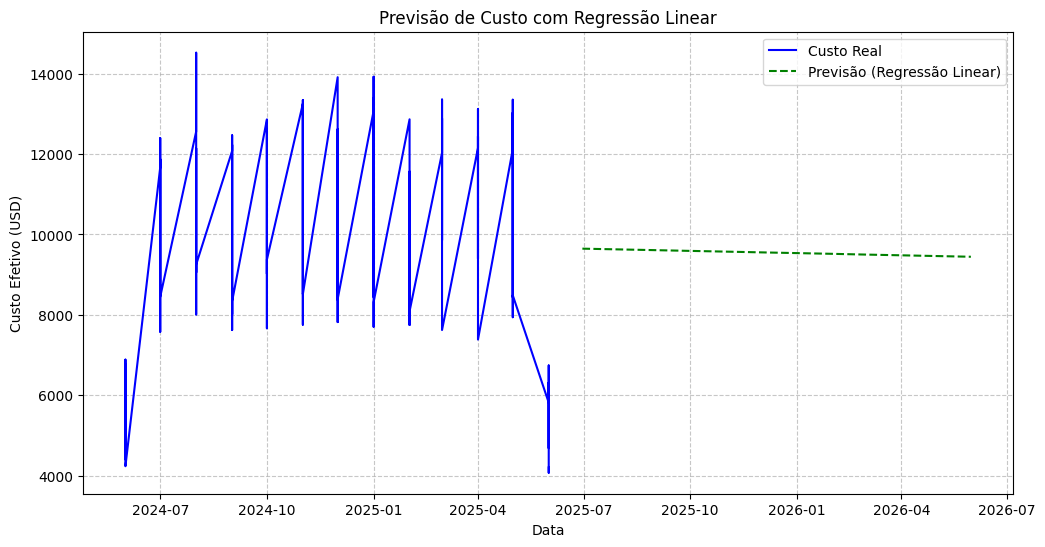

In [27]:
# Célula: Visualiza a previsão do modelo de Regressão Linear

# Gerar previsões futuras para a Regressão Linear
future_dates = pd.date_range(start=df_monthly['ds'].max(), periods=12, freq='M')
future_month_nums = (future_dates.year - df_monthly['ds'].dt.year.min()) * 12 + future_dates.month
future_forecast_lr = lr_model.predict(pd.DataFrame({'month_num': future_month_nums}))

# Visualizar a previsão da Regressão Linear
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['ds'], df_monthly['y'], label='Custo Real', color='blue')
plt.plot(future_dates, future_forecast_lr, label='Previsão (Regressão Linear)', color='green', linestyle='--')
plt.title('Previsão de Custo com Regressão Linear')
plt.xlabel('Data')
plt.ylabel('Custo Efetivo (USD)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()